In [79]:
import pandas as pd

In [80]:
# Importing the data

SMS_df = pd.read_csv('Data/spam.csv') # 5572 entries
SMS_df.drop(['h', 'l', 'Unnamed: 4'],axis=1, inplace=True)
X = SMS_df['v2'] # shape = (5572,)
y = SMS_df.drop('v2', axis=1) # ham - 4825, spam - 747

In [81]:
# making the string labels as number

y_mapped = y.replace({'ham': 0, 'spam': 1})

C:\Users\aayus\AppData\Local\Temp\ipykernel_27416\3607508160.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_mapped = y.replace({'ham': 0, 'spam': 1})


In [82]:
# here the input data is in the form of text (strings)
# any ML model is not made for the text based dataset
# therefore we will convert the data into numbers using normal Vectorization and TF-IDF Vectorization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

C_Vector = CountVectorizer()
Tfid_Vector = TfidfVectorizer()
X_Count = C_Vector.fit_transform(X) 
X_TFIDF = Tfid_Vector.fit_transform(X)
# new shape - (5572, 8625)

In [83]:
# now the number of spam entries is very small
# therefore we will make new data entries using SMOTE - Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled_count, y_resampled_count = smote.fit_resample(X_Count, y) 
X_resampled_tfidf, y_resampled_tfidf = smote.fit_resample(X_TFIDF, y)
# new shape = (9650, 8625)

In [84]:
# splitting both the datasets into training and testing
from sklearn.model_selection import train_test_split

train_X_count, test_X_count, train_y_count, test_y_count = train_test_split(X_resampled_count, y_resampled_count, random_state=43)
train_X_Tfidf, test_X_Tfidf, train_y_Tfidf, test_y_Tfidf = train_test_split(X_resampled_tfidf, y_resampled_tfidf, random_state=43)

In [85]:
# Choosing and training the model 
# since the text data dont have any relation within themselves 
# for eg: it is not necessary that if "was" is in the text then "to" will also be present
# but numerical datasets have some relations between the features - Correlation
# therefore Naive Bayes will be a good choice
from sklearn.naive_bayes import MultinomialNB

naive_bayes_count = MultinomialNB() # Naive bayes for dataset converted using Count Vectorizer
naive_bayes_tfidf = MultinomialNB() # Naive Bayes for dataset converted using TF-IDF Vectorizer

naive_bayes_count.fit(train_X_count, train_y_count)
naive_bayes_tfidf.fit(train_X_Tfidf, train_y_Tfidf)

c:\Users\aayus\Dev\CODSOFT\myenv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aayus\Dev\CODSOFT\myenv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [86]:
# Predictions and evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred_count = naive_bayes_count.predict(test_X_count)
y_pred_tfidf = naive_bayes_tfidf.predict(test_X_Tfidf)

print(f"Accuracy Score for Count Vectorized dataset: {accuracy_score(y_pred=y_pred_count, y_true=test_y_count):.5f}") # = 0.97099
print(f"Classification report for Count Vectorized dataset: \n {classification_report(y_pred=y_pred_count, y_true=test_y_count)}")
print(f"\nAccuracy Score for TF-IDF Vectorized dataset: {accuracy_score(y_pred=y_pred_tfidf, y_true=test_y_Tfidf):.5f}") # 0.98591
print(f"Classification report for TF-IDF Vectorized dataset: \n {classification_report(y_pred=y_pred_tfidf, y_true=test_y_Tfidf)}")

Accuracy Score for Count Vectorized dataset: 0.97265
Classification report for Count Vectorized dataset: 
               precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1220
        spam       0.99      0.96      0.97      1193

    accuracy                           0.97      2413
   macro avg       0.97      0.97      0.97      2413
weighted avg       0.97      0.97      0.97      2413


Accuracy Score for TF-IDF Vectorized dataset: 0.98591
Classification report for TF-IDF Vectorized dataset: 
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1220
        spam       0.98      0.99      0.99      1193

    accuracy                           0.99      2413
   macro avg       0.99      0.99      0.99      2413
weighted avg       0.99      0.99      0.99      2413



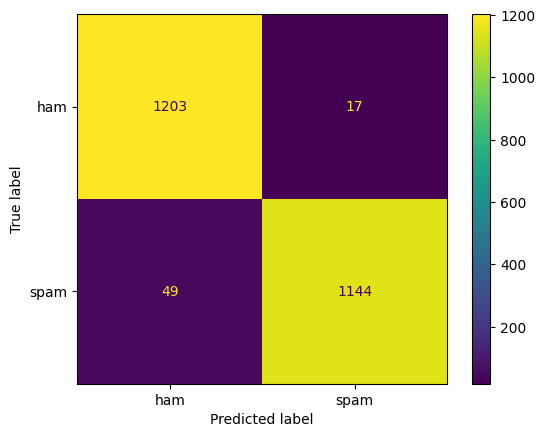

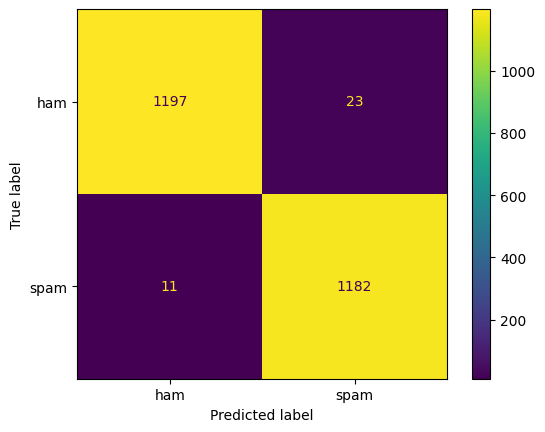

In [87]:
import matplotlib.pyplot as plt

conf_mat_count = confusion_matrix(y_pred=y_pred_count, y_true=test_y_count)
conf_mat_tfidf = confusion_matrix(y_pred=y_pred_tfidf, y_true=test_y_Tfidf)

conf_mat_disp_count = ConfusionMatrixDisplay(confusion_matrix=conf_mat_count, display_labels=['ham', 'spam'])
conf_mat_disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=conf_mat_tfidf, display_labels=['ham', 'spam'])
conf_mat_disp_count.plot()
conf_mat_disp_tfidf.plot()
plt.show()